In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()
from matplotlib.pyplot import rc_context

Memory usage: current 0.14 GB, difference +0.14 GB
scanpy==1.10.2 anndata==0.10.8 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [3]:
import decoupler as dc

In [4]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [5]:
import matplotlib as mpl
mpl.rc("font", family = "Arial")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


# Mature Neutrophils

In [6]:
mature_neutrophils = pd.read_csv("dge/final/pseudobulk_volcano_mature_neutrophils_AML_vs_HD.csv", index_col=0)

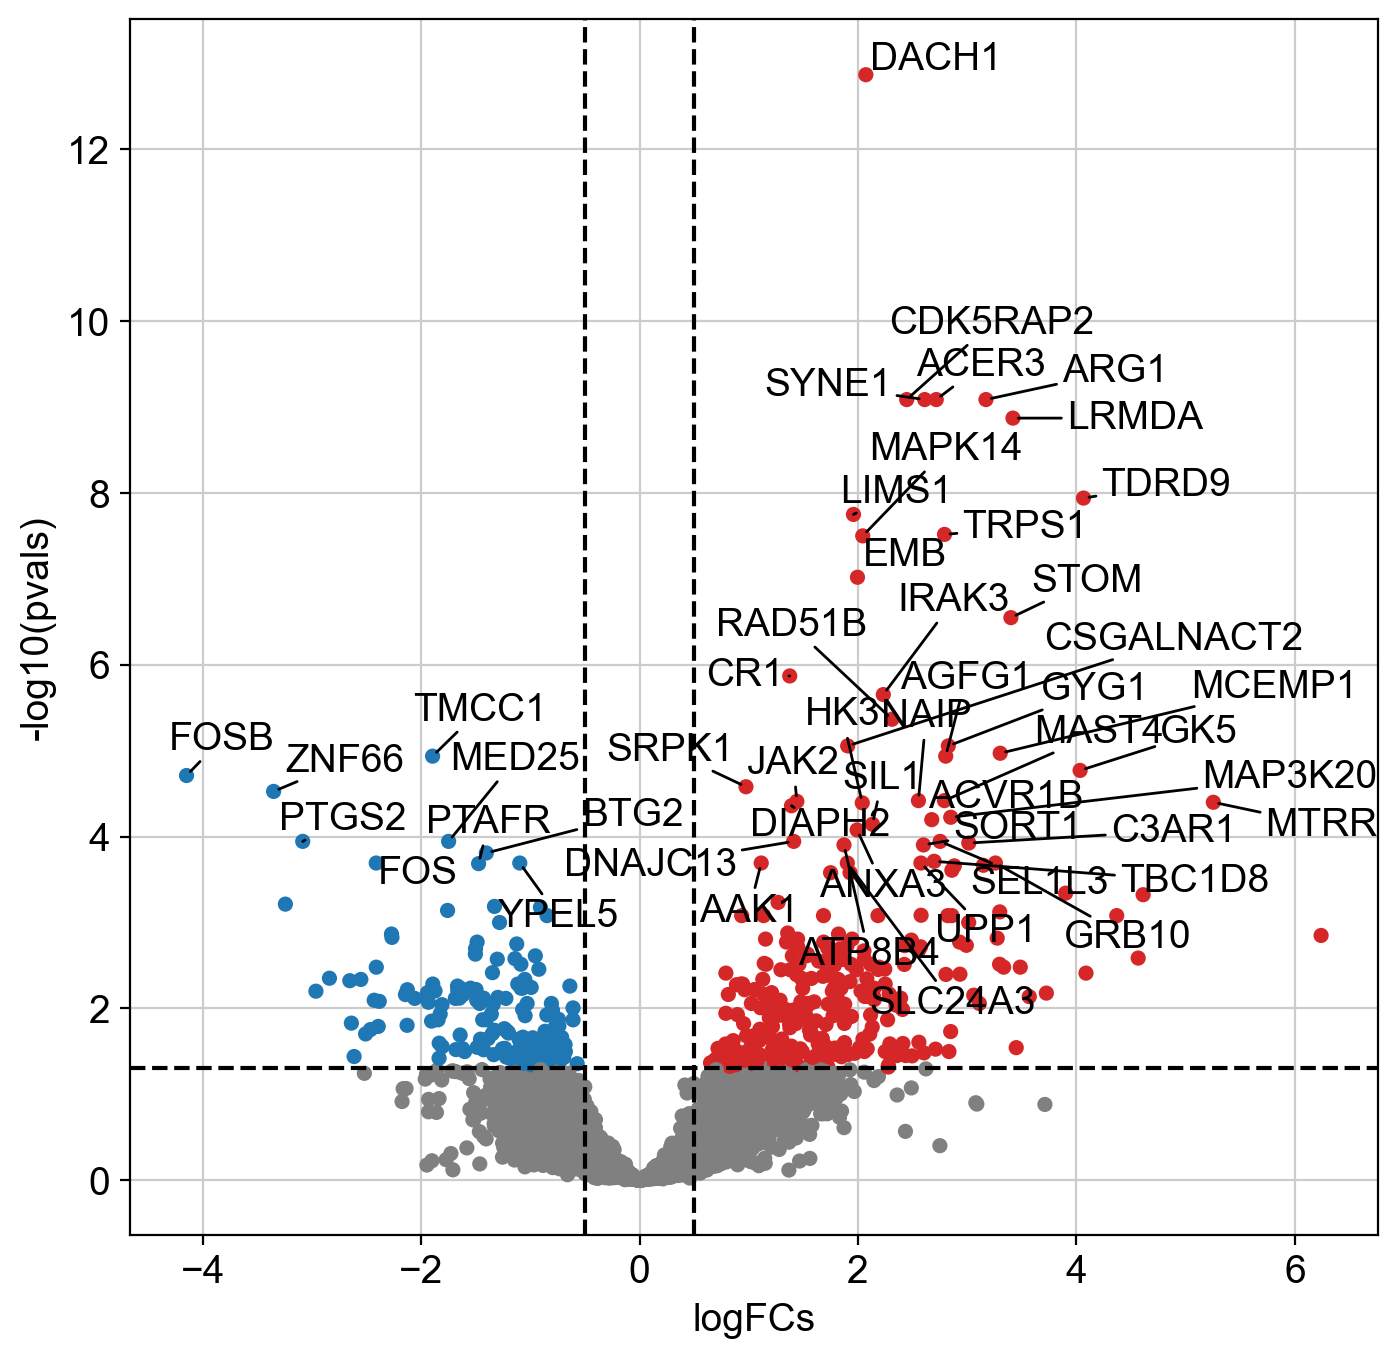

In [8]:
fig = dc.plot_volcano_df(
    mature_neutrophils,
    x = "log2FoldChange",
    y = "padj",
    top = 50,
    figsize = (8, 8), return_fig = True
)
plt.show()

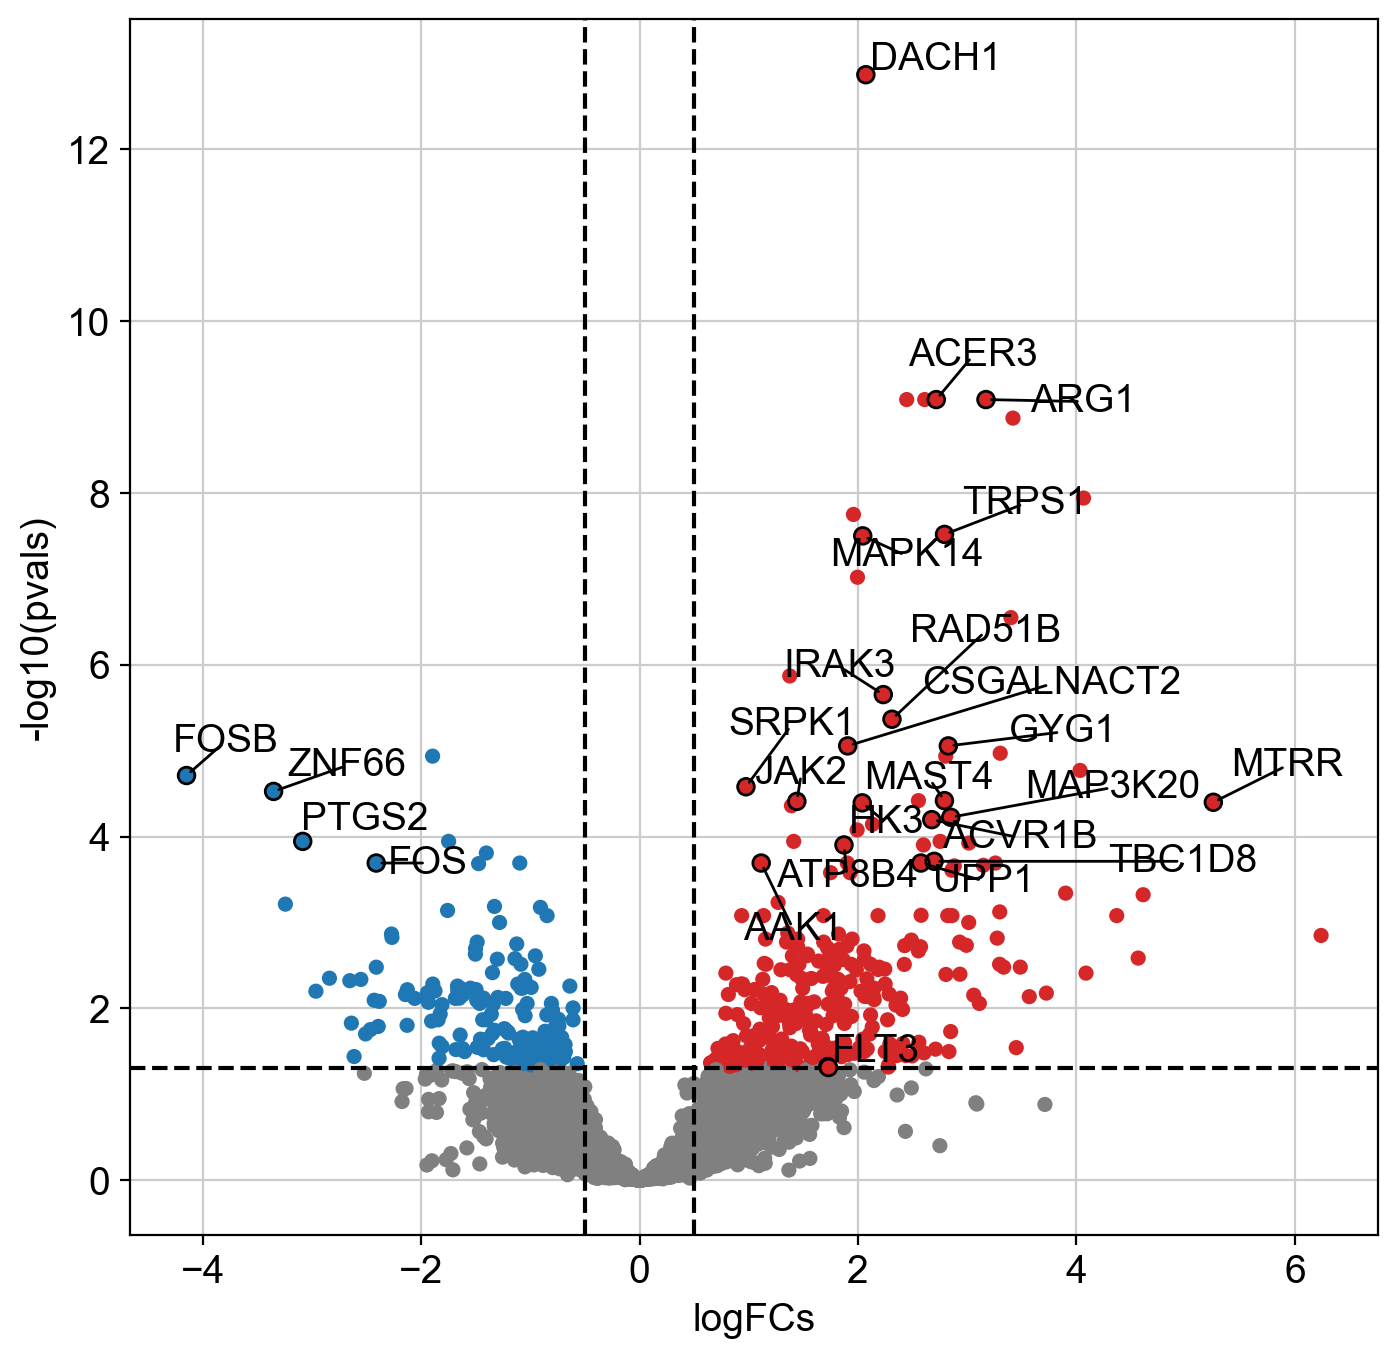

In [9]:
import matplotlib.patheffects as path_effects
import adjustText as at

# List of additional genes to highlight
tf =["DACH1", "TRPS1", "FOS", "FOSB", "ZNF66"]
enzymes = ["FLT3", "ARG1", "ACER3", "MAPK14", "IRAK3", "RAD51B", "GYG1", "CSGALNACT2", "SRPK1", "MAST4", "JAK2", "MTRR", "HK3", "MAP3K20", "ACVR1B", "PTGS2", "ATP8B4", "AAK1", "TBC1D8", "UPP1"]
highlight_genes = tf + enzymes

# Extract the subset of the DataFrame for these genes
highlight_df = mature_neutrophils.loc[mature_neutrophils.index.isin(highlight_genes)]

# Generate the volcano plot as before
fig = dc.plot_volcano_df(
    mature_neutrophils,
    x="log2FoldChange",
    y="padj",
    sign_thr=0.05,
    #lFCs_thr=2.5,
    top=0,
    figsize=(8, 8),
    return_fig=True
)

texts = []

# Add the additional genes to the plot
ax = fig.gca()
for gene, row in highlight_df.iterrows():
    x = row["log2FoldChange"]
    y = -np.log10(row["padj"])
    ax.scatter(x, y, facecolor="none", edgecolor="black", zorder = 5)
    text = ax.text(x, y, gene, color="black")

    texts.append(text)
    if gene == "FLT3":
        ax.scatter(x, y, facecolor="#D62728", edgecolor="black", zorder = 5)

# Adjust text
at.adjust_text(
    texts,
    expand_text=(1.2, 1.4),
    arrowprops=dict(
        arrowstyle="-", 
        color="black",  

    ),
)

plt.savefig("figures/final/volcano/volcano_tf_and_enzymes_mature_neutrophils_aml_vs_hd_v2.pdf", transparent = True, bbox_inches="tight")
plt.show()


# Basophils

In [11]:
basophils = pd.read_csv("dge/final/pseudobulk_volcano_basophils_AML_vs_HD.csv", index_col=0)

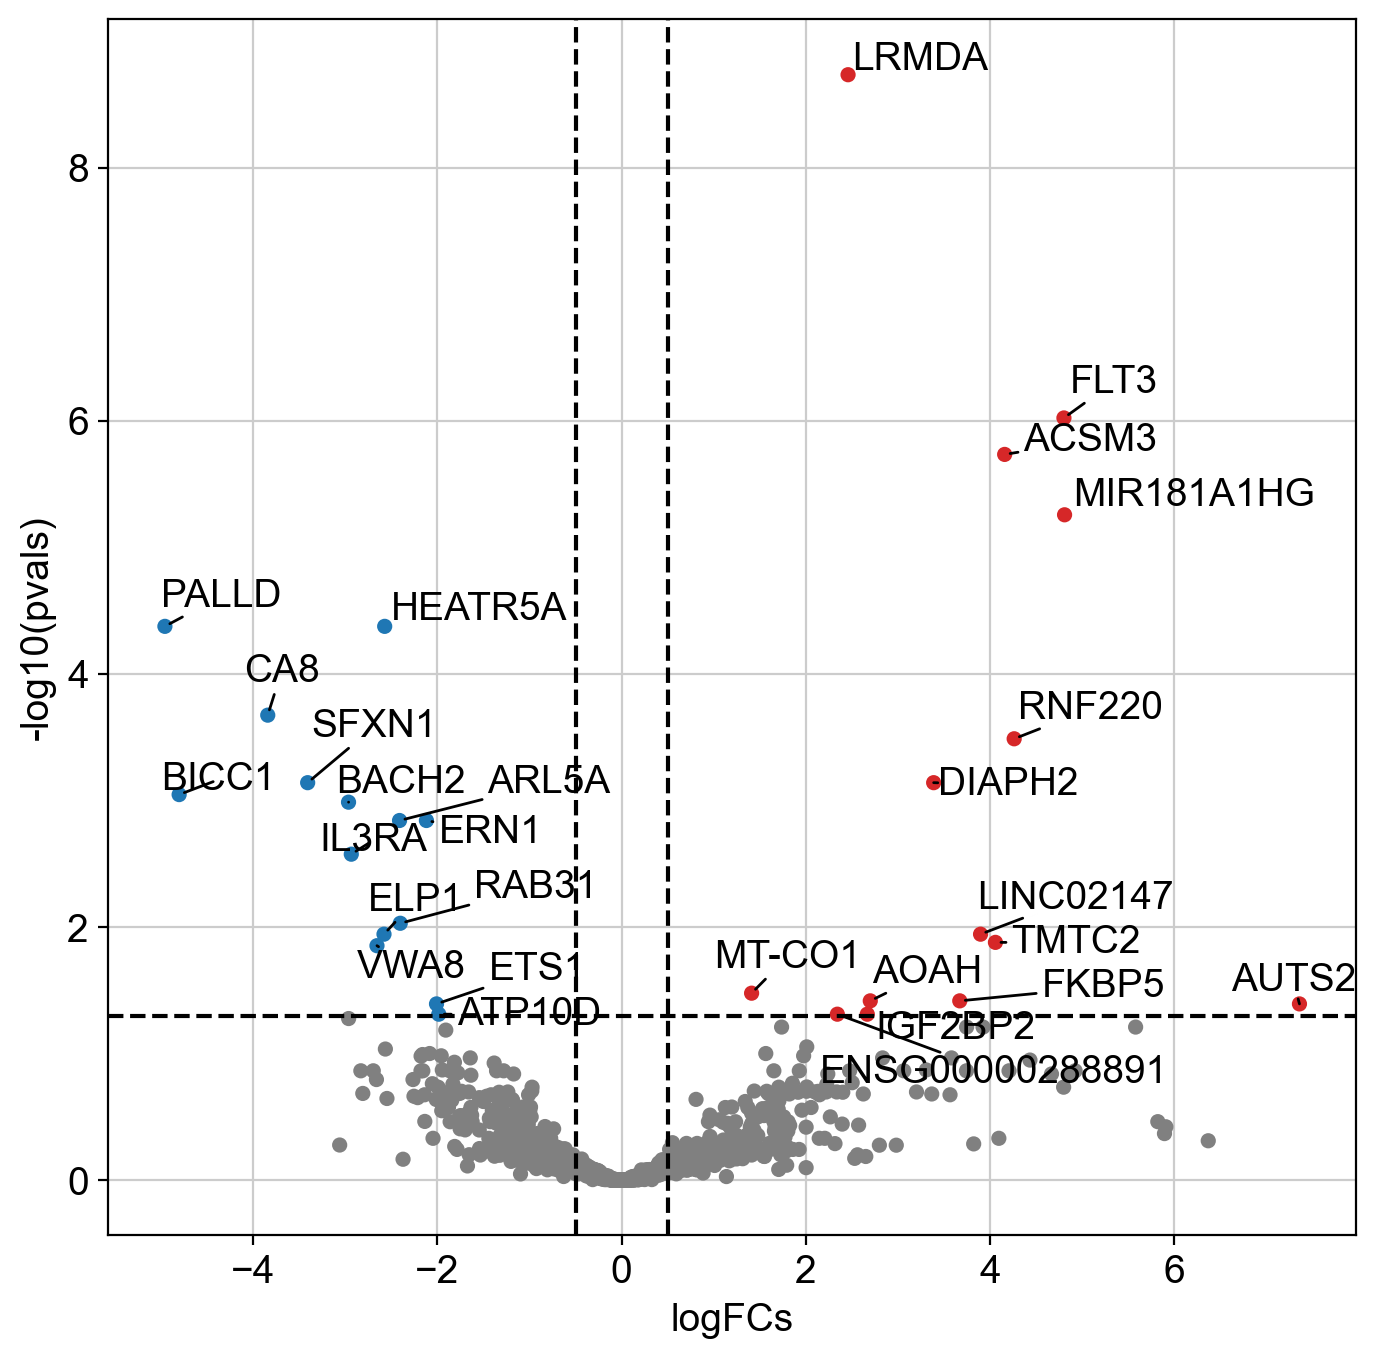

In [12]:
fig = dc.plot_volcano_df(
    basophils,
    x = "log2FoldChange",
    y = "padj",
    top = 50,
    figsize = (8, 8), return_fig = True
)
plt.show()

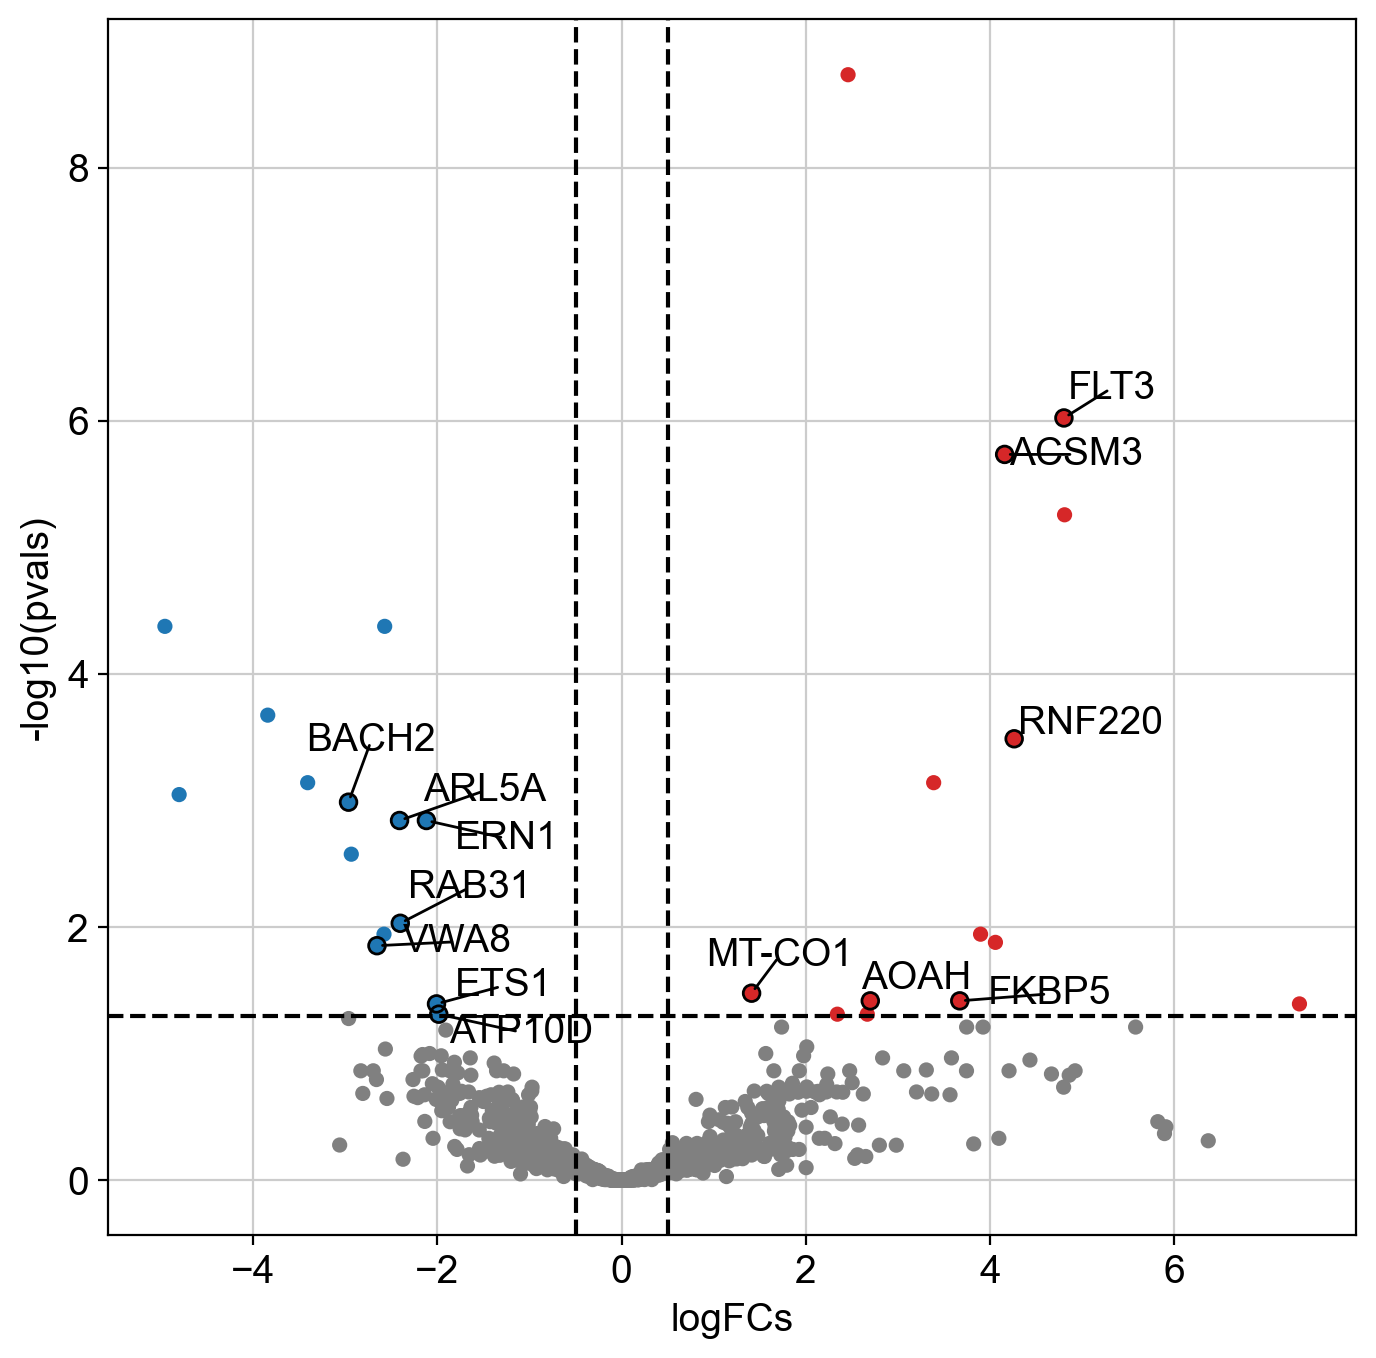

In [20]:
import matplotlib.patheffects as path_effects
import adjustText as at

# List of additional genes to highlight
tf =["BACH2", "ETS1"]
enzymes = ["FLT3", "RNF220", "ACSM3", "FKBP5", "AOAH", "ERN1", "ATP10D", "MT-CO1", "ARL5A", "RAB31", "VWA8"]
highlight_genes = tf + enzymes

# Extract the subset of the DataFrame for these genes
highlight_df = basophils.loc[basophils.index.isin(highlight_genes)]

# Generate the volcano plot as before
fig = dc.plot_volcano_df(
    basophils,
    x="log2FoldChange",
    y="padj",
    sign_thr=0.05,
    #lFCs_thr=2.5,
    top=0,
    figsize=(8, 8),
    return_fig=True
)


texts = []

# Add the additional genes to the plot
ax = fig.gca()
for gene, row in highlight_df.iterrows():
    x = row["log2FoldChange"]
    y = -np.log10(row["padj"])
    ax.scatter(x, y, facecolor="none", edgecolor="black", zorder = 5)
    text = ax.text(x, y, gene, color="black")
    texts.append(text)

# Adjust text
at.adjust_text(
    texts,
    expand_text=(1.2, 1.4),  
    arrowprops=dict(
        arrowstyle="-",  
        color="black",    
    ),
)


plt.savefig("figures/final/volcano/volcano_tf_and_enzymes_basophils_aml_vs_hd.pdf", transparent = True, bbox_inches="tight")
plt.show()
